In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("/content/WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Variables**

1 - Type: white or red

2 - fixed acidity

3 - volatile acidity

4 - citric acid

5 - residual sugar

6 - chlorides

7 - free sulfur dioxide

8 - total sulfur dioxide

9 - density

10 - pH

11 - sulphates

12 - alcohol

**Output variable**

quality (score between 0 and 10)

#**Data Analysis and Visualization**

In [4]:
data.shape

(1143, 13)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data = data.drop('Id', axis='columns')

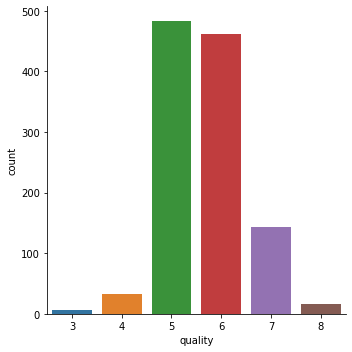

In [9]:
sns.catplot(x='quality', data = data, kind = 'count')

<BarContainer object of 1143 artists>

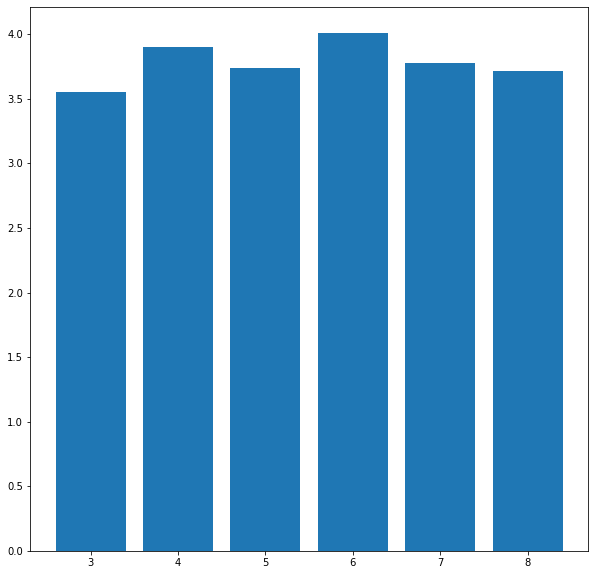

In [10]:
plt.figure(figsize=(10,10))

plt.bar(data['quality'], data['pH'])

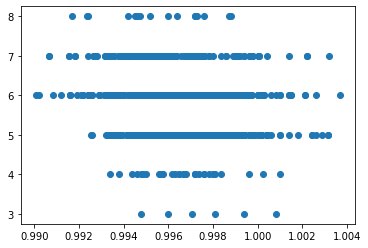

In [11]:
plt.scatter(data['density'], data['quality'])

<AxesSubplot:>

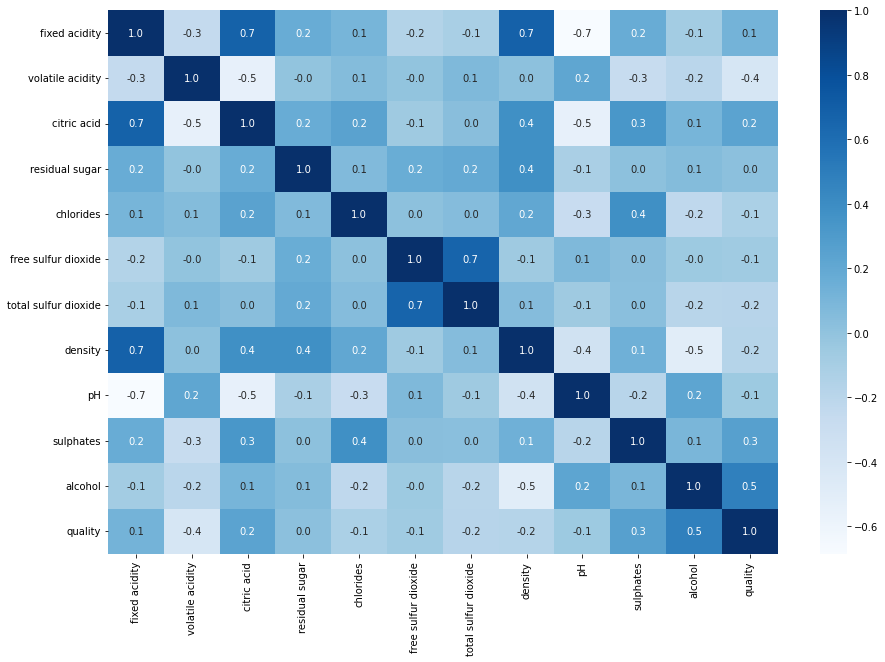

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, fmt = '.1f',cmap = 'Blues')

#**Data Preprocessing**

In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [149]:
X = data.drop('quality',axis=1)
Y = data['quality'].apply(lambda y: 1 if y>=7 else 0)

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [151]:
print(X.shape, X_train.shape, X_test.shape)

(1143, 11) (914, 11) (229, 11)


In [152]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


# **Model Training**

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=3)
model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=3)

In [160]:
pred = model.predict(X_train)
acc = accuracy_score(pred, Y_train)
acc

1.0

In [155]:
pred2 = model.predict(X_test)
acc2 = accuracy_score(pred2, Y_test)
acc2

0.8951965065502183